In [261]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
#ml
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
import ipywidgets
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.gridspec as gridspec

In [262]:
df=pd.read_csv('stats.csv')
df=df[['wins', 'goals', 'total_pass', 'season', 'team']]
df['season'] = pd.Categorical(df['season'])
df['season_code'] = df['season'].cat.codes
df

,wins,goals,total_pass,season,team,season_code
0,28.0,83.0,18723.0,2006-2007,Manchester United,0
1,24.0,64.0,16759.0,2006-2007,Chelsea,0
2,20.0,57.0,17154.0,2006-2007,Liverpool,0
3,19.0,63.0,18458.0,2006-2007,Arsenal,0
4,17.0,57.0,14914.0,2006-2007,Tottenham Hotspur,0
...,...,...,...,...,...,...
235,9.0,28.0,14960.0,2017-2018,Huddersfield Town,11
236,8.0,28.0,15721.0,2017-2018,Swansea City,11
237,7.0,37.0,17174.0,2017-2018,Southampton,11
238,7.0,35.0,12892.0,2017-2018,Stoke City,11


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   wins         240 non-null    float64 
 1   goals        240 non-null    float64 
 2   total_pass   240 non-null    float64 
 3   season       240 non-null    category
 4   team         240 non-null    object  
 5   season_code  240 non-null    int8    
dtypes: category(1), float64(3), int8(1), object(1)
memory usage: 8.5+ KB


In [264]:
#plt.figure(figsize=(30, 10))
#x = df['wins']
#y = df['goals']
#plt.scatter(x, y, c=df['season_code'])
#a, b = np.polyfit(x, y, 1)
#plt.title("Premier League Seasons Wins vs Goals")
#plt.xlabel("Wins")
#plt.ylabel("Goals Scored")
#plt.plot(x, a*x+b)  

# Predict wins from goals
### SPLIT TRAINING AND TESTING DATA SET
12 total seasons
20 entries per season
80/20 split = 10/2 *season* = 200/40 entries

In [265]:
#testing = df.loc[:39]
#training = df.loc[40: , ['wins', 'goals']]
#training

In [266]:
#scaler=MinMaxScaler(feature_range=(0,1))
#final_data = df[['wins', 'goals']]
#train_data=training
#valid_data=testing
#scaler=MinMaxScaler(feature_range=(0,1))
#scaled_data=scaler.fit_transform(final_data)
#x_train_data,y_train_data=[],[]
#for i in range(60,len(train_data)):
    #x_train_data.append(scaled_data[i-60:i,0])
    #y_train_data.append(scaled_data[i,0])

#x_test_data,y_test_data=[],[]
#for i in range(60,len(valid_data)):
    #x_test_data.append(scaled_data[i-60:i,0])
    #y_test_data.append(scaled_data[i,0])

In [267]:
#final_data

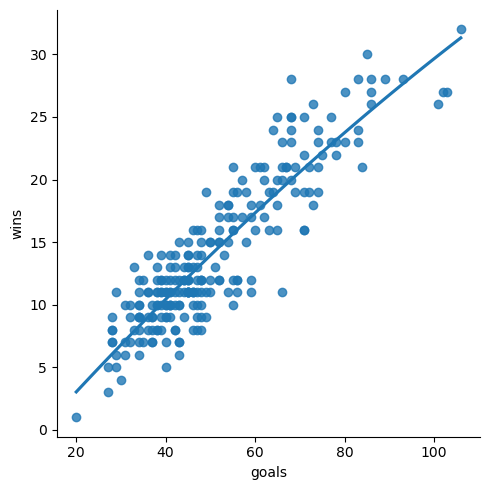

In [268]:
sns.lmplot(x ="goals", y ="wins", data = final_data, order = 2, ci = None)

In [269]:
X = np.array(final_data['goals']).reshape(-1, 1)
y = np.array(final_data['wins']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
final_data.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.828297409951953


C:\Users\ruiz_\AppData\Local\Temp\ipykernel_6760\2070977971.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.dropna(inplace = True)


Reading Output

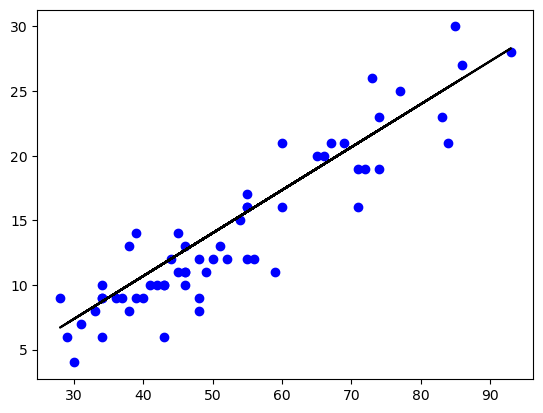

In [270]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

In [271]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 2.034149532008326
MSE: 6.392868988800008
RMSE: 2.5284123454848118


## Predict Value

In [272]:
r_sq = regr.score(X_test, y_test)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', regr.intercept_)

# Print the Slope:
print('slope:', regr.coef_) 


coefficient of determination: 0.828297409951953
intercept: [-2.60739875]
slope: [[0.33245462]]


### Interactive Graph

In [273]:
@ipywidgets.interact(goals=list(range(20,101)))
def predict_wins(goals):
    X = np.array(final_data['goals']).reshape(-1, 1)
    y = np.array(final_data['wins']).reshape(-1, 1)

    # Separating the data into independent and dependent variables
    # Converting each dataframe into a numpy array 
    # since each dataframe contains only one column
    final_data.dropna(inplace = True)

    # Dropping any rows with Nan values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Splitting the data into training and testing data
    regr = LinearRegression()

    regr.fit(X_train, y_train)
    print(regr.score(X_test, y_test))
    # Predict a Response and print it:
    y_pred = regr.predict(np.array(goals).reshape((-1, 1)))
    print('Predicted wins:', y_pred, sep='\n')

    sns.lmplot(x ="goals", y ="wins", data = final_data, order = 2, ci = None, height=3, aspect=1.5)
    plt.scatter(x=goals, y=y_pred, color='r')
    return y_pred

interactive(children=(Dropdown(description='goals', options=(20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3…

# Predict goals from passes
### SPLIT TRAINING AND TESTING DATA SET
12 total seasons
20 entries per season
80/20 split = 10/2 *season* = 200/40 entries

In [274]:
#testing = df.loc[:39]
#training = df.loc[40: , ['goals', 'total_pass']]
#training

In [275]:
#scaler=MinMaxScaler(feature_range=(0,1))
#final_data2 = df[['goals', 'total_pass']]
#train_data=training
#valid_data=testing
#scaler=MinMaxScaler(feature_range=(0,1))
#scaled_data=scaler.fit_transform(final_data)
#x_train_data,y_train_data=[],[]
#for i in range(60,len(train_data)):
    #x_train_data.append(scaled_data[i-60:i,0])
    #y_train_data.append(scaled_data[i,0])

#x_test_data,y_test_data=[],[]
#for i in range(60,len(valid_data)):
    #x_test_data.append(scaled_data[i-60:i,0])
    #y_test_data.append(scaled_data[i,0])

In [276]:
#final_data2

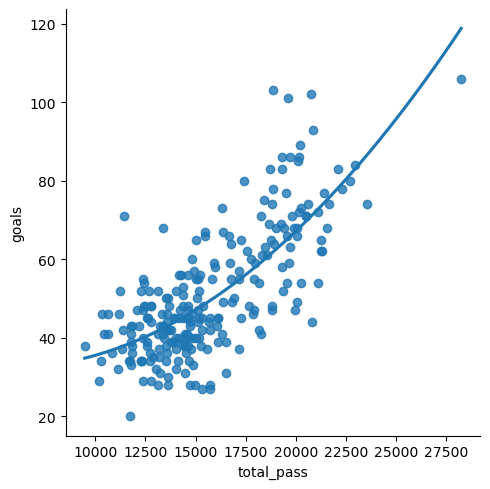

In [277]:
sns.lmplot(x ="total_pass", y ="goals", data = final_data2, order = 2, ci = None)

In [278]:
X = np.array(final_data2['total_pass']).reshape(-1, 1)
y = np.array(final_data2['goals']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
final_data2.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.4743351641619411


C:\Users\ruiz_\AppData\Local\Temp\ipykernel_6760\3606074552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data2.dropna(inplace = True)


Linear regression not a good fit

### Polynomial Regression

In [279]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [280]:
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
print(poly_reg_model.score(poly.fit_transform(X_test), y_test))

0.4818649674580848


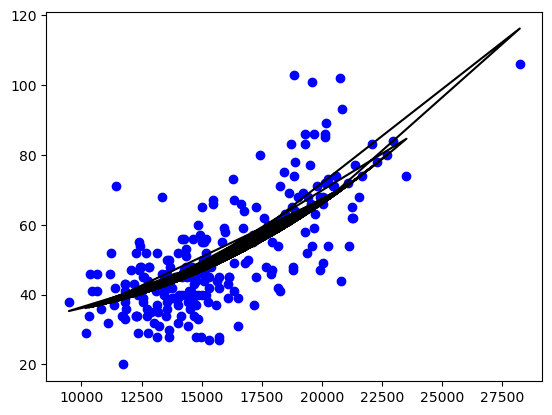

In [281]:
y_pred = poly_reg_model.predict(poly.fit_transform(X))
plt.scatter(X, y, color ='b')
plt.plot(X, y_pred, color ='k')
  
plt.show()

Polynomial regression not ideal

### Interactive Graph

In [282]:


@ipywidgets.interact(passes=ipywidgets.BoundedIntText(
    value=10000,
    min=8000,
    max=30000,
    step=1000,
    description='Passes:',
    disabled=False
))
def predict_goals(passes):
    # Predict a Response and print it:
    passes_data = poly.fit_transform(np.array([passes]).reshape((-1, 1)))
    y_pred = poly_reg_model.predict(passes_data)
    print('Predicted goals:', y_pred, sep='\n')

    fig = sns.lmplot(x ="total_pass", y ="goals", data = final_data2, order = 2, ci = None, height=3, aspect=1.5)
    fig = plt.scatter(x=passes, y=y_pred, color='r')
    return y_pred

interactive(children=(BoundedIntText(value=10000, description='Passes:', max=30000, min=8000, step=1000), Outp…

# Dashboard

In [283]:
#myLabel = ipywidgets.Label()
@ipywidgets.interact(passes=ipywidgets.BoundedIntText(
    value=10000,
    min=8000,
    max=28000,
    step=1000,
    description='Passes:',
    disabled=False
))
def dashboard(passes):
    goals = predict_goals(passes)
    wins = predict_wins(goals[0][0])
    print('Goals:', goals, 'Wins:', wins)
    
    


interactive(children=(BoundedIntText(value=10000, description='Passes:', max=28000, min=8000, step=1000), Outp…

# How To Use

The dashboard takes any number of total passes that a team in the premier league has completed in the entire season. The first graph will then update the number of goals that team is expected to score based on passes completed, and then interact with the second graph to predict the number of wins the team will end the season with. Both outputs will be printed to the screen.

Contextual Dataset:

In [284]:
df=pd.read_csv('results.csv')
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


This dataset is useful in providing context to the above data by showing the actual individual game results within each season that the collective data was recorded from.

My dataset is not large

To compare predicted outputs to real outputs, use the link below
https://www.premierleague.com/stats/top/clubs/wins?se=363

Pick a team in the 2020-2021 season (was not in testing or training dataset) and filter by passes completed to enter the value into the notebook. Then compare goals/wins that season to the predicted output.